In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import linregress

pd.options.display.max_columns = None
pd.options.display.width = None
pd.set_option('display.max_rows', 50)

<h2>howto Kaggle Public API</h2>

https://www.kaggle.com/docs/api

In [22]:
!kaggle datasets download -d sudalairajkumar/cryptocurrency-historical-prices-coingecko -f bitcoin.csv --force -p ../CSVData
!kaggle datasets download -d sudalairajkumar/cryptocurrency-historical-prices-coingecko -f ethereum.csv --force -p ../CSVData

100%|█████████████████████████████████████████| 277k/277k [00:00<00:00, 653kB/s]
100%|█████████████████████████████████████████| 277k/277k [00:00<00:00, 653kB/s]
100%|█████████████████████████████████████████| 269k/269k [00:00<00:00, 645kB/s]
100%|█████████████████████████████████████████| 269k/269k [00:00<00:00, 644kB/s]


In [23]:
shares = ["bitcoin", "ethereum"]
tickers_str = ', '.join(shares)
all_dfs = pd.DataFrame()

for ticker in shares:
    df = pd.read_csv(f"../CSVData/{ticker}.csv", index_col=["date"])
    df = df.add_suffix(f'_{ticker}')
    all_dfs = pd.concat([all_dfs, df[f'price_{ticker}']], axis=1).dropna()
all_dfs.sort_index(axis=0, ascending=False)

,price_bitcoin,price_ethereum
2024-02-18 00:00:00.000,51684.517493,2788.561332
2024-02-17 00:00:00.000,52166.434310,2807.371703
2024-02-16 00:00:00.000,51958.230291,2826.821476
2024-02-15 00:00:00.000,51790.169298,2780.372975
2024-02-14 00:00:00.000,49732.145370,2641.536097
...,...,...
2015-08-12 00:00:00.000,267.712600,1.256613
2015-08-11 00:00:00.000,269.866800,1.067379
2015-08-10 00:00:00.000,263.578200,0.687586
2015-08-08 00:00:00.000,259.800728,1.330750


In [24]:
btc = x = np.array(list(all_dfs['price_bitcoin'])).reshape((-1, 1))  # независимая переменная, предсказание
eth = y = np.array(list(all_dfs['price_ethereum']))  # зависимая переменная, ответ

In [25]:
f"{all_dfs['price_bitcoin'].corr(all_dfs['price_ethereum']):.4f}"

'0.9419'

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression().fit(x, y)

In [28]:
print('coefficient of determination R^2:', model.score(x, y))
print('intercept:', model.intercept_)
print('coef:', model.coef_[0])

coefficient of determination R^2: 0.887266737155207
intercept: -85.0860504811942
coef: 0.062429483122366604


In [29]:
x_new = np.array([43000, 44000, 45000, 50000]).reshape((-1, 1))
y_new = model.predict(x_new).round(2)

In [30]:
print(f'predicted response:', *y_new, sep='\n')

predicted response:
2599.38
2661.81
2724.24
3036.39


In [31]:
all_dfs['price_ethereum_clear'] = model.intercept_ + model.coef_[0] * all_dfs['price_bitcoin']
all_dfs.sort_index(axis=0, ascending=False)

,price_bitcoin,price_ethereum,price_ethereum_clear
2024-02-18 00:00:00.000,51684.517493,2788.561332,3141.551662
2024-02-17 00:00:00.000,52166.434310,2807.371703,3171.637480
2024-02-16 00:00:00.000,51958.230291,2826.821476,3158.639411
2024-02-15 00:00:00.000,51790.169298,2780.372975,3148.147450
2024-02-14 00:00:00.000,49732.145370,2641.536097,3019.666080
...,...,...,...
2015-08-12 00:00:00.000,267.712600,1.256613,-68.372891
2015-08-11 00:00:00.000,269.866800,1.067379,-68.238406
2015-08-10 00:00:00.000,263.578200,0.687586,-68.631000
2015-08-08 00:00:00.000,259.800728,1.330750,-68.866825


In [32]:
DT = all_dfs.index
BTC = all_dfs['price_bitcoin']
ETH = all_dfs['price_ethereum']

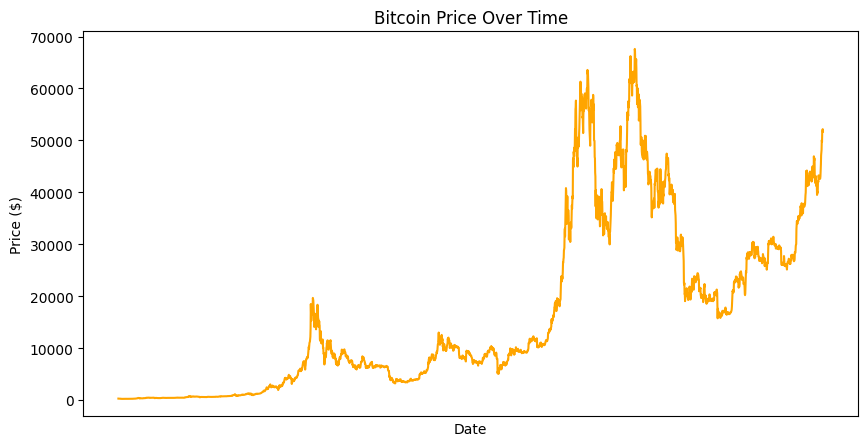

In [33]:
# Построим график цен на биткоин и сохраним его в файл
plt.figure(figsize=(10, 5))
plt.plot(DT, BTC, label='Bitcoin Price', color='orange')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.xticks([])
plt.savefig('bitcoin_price.png') 
plt.show()

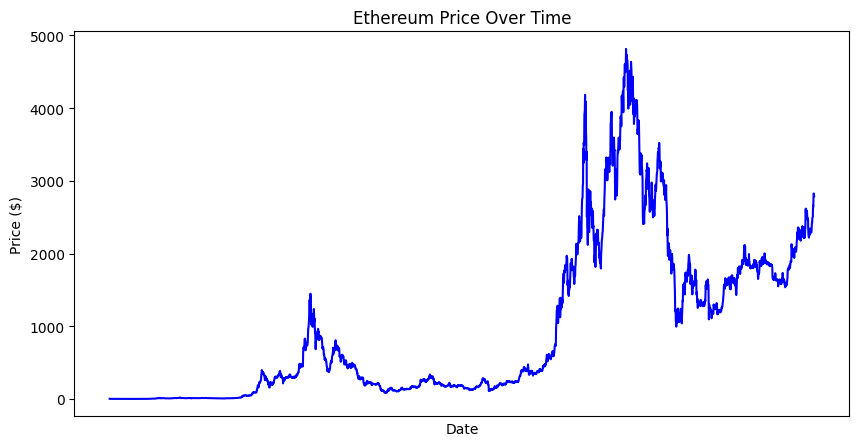

In [34]:
# Построим график цен на эфир и сохраним его в файл
plt.figure(figsize=(10, 5))
plt.plot(DT, ETH, label='Ethereum Price', color='blue')
plt.title('Ethereum Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.xticks([])
plt.savefig('ethereum_price.png')
plt.show()

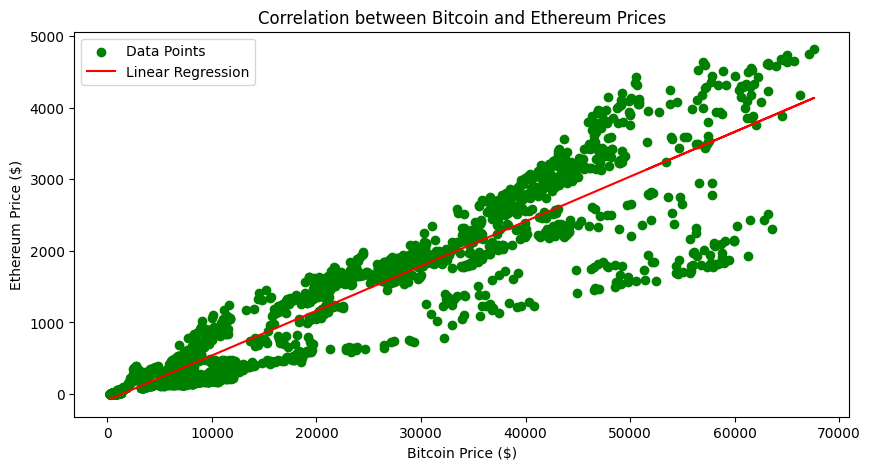

In [35]:
# Построим график корреляции между ценами на биткоин и эфир и сохраним его в файл
plt.figure(figsize=(10, 5))
plt.scatter(BTC, ETH, color='green', label='Data Points')

slope, intercept, r_value, p_value, std_err = linregress(BTC, ETH)
LINE = slope * BTC + intercept
plt.plot(BTC, LINE, color='red', label='Linear Regression')

plt.title('Correlation between Bitcoin and Ethereum Prices')
plt.xlabel('Bitcoin Price ($)')
plt.ylabel('Ethereum Price ($)')
plt.legend()
plt.savefig('correlation_with_regression.png')
plt.show()

In [36]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(BTC, ETH)
print("Pearson's product-moment correlation:")
print(f"Correlation: {correlation:.4f}")
print(f"P-value: {p_value}")

Pearson's product-moment correlation:
Correlation: 0.9419
P-value: 0.0
